Q1: What is Boosting in Machine Learning? Explain how it improves weak  learners.           
 - Boosting is an ensemble learning technique that combines multiple weak learners (models that perform only slightly better than random guessing) to create a strong predictive model.

 - Boosting works sequentially:

    Each new model focuses more on the errors made by previous models

    Misclassified or high-error samples are given more importance

    Final prediction is a weighted combination of all models

    This way, the overall model gradually improves performance.

- Key idea

    “Learn from mistakes step by step.”

- Example

    A single shallow decision tree performs poorly

    Boosting combines many such trees → high accuracy                 
                        
Q2: What is the difference between AdaBoost and Gradient Boosting in terms  of how models are trained?      
- | Aspect           | AdaBoost                             | Gradient Boosting                 |
| ---------------- | ------------------------------------ | --------------------------------- |
| Error handling   | Reweights misclassified samples      | Fits new model to residual errors |
| Focus            | Classification errors                | Loss function minimization        |
| Model dependency | Strongly dependent on previous model | Optimizes gradients               |
| Flexibility      | Limited                              | Highly flexible                   |
| Speed            | Faster                               | Slower but more powerful          |

- In simple terms

    AdaBoost: “Increase weight of wrong predictions”

    Gradient Boosting: “Fit the error curve mathematically”

Q3: How does regularization help in XGBoost?
- XGBoost includes explicit regularization to prevent overfitting.

- Types

    L1 Regularization (alpha)
    → Makes feature weights zero (feature selection)

    L2 Regularization (lambda)
    → Penalizes large weights (smooth model)

    Tree complexity penalty
    → Penalizes too many splits or deep trees

- Benefit

    Reduces overfitting

    Improves generalization

    Produces simpler models

Q4: Why is CatBoost considered efficient for handling categorical data?
- CatBoost is efficient because:

    It automatically encodes categorical features

    Uses ordered target encoding to avoid data leakage

    No need for one-hot encoding

    Handles high-cardinality categories well

- Why it matters

    Traditional encoding:

    Increases dimensionality

    Causes overfitting

- CatBoost:

    Keeps data compact

    Improves accuracy

Q5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

Datasets:

● Use sklearn.datasets.load_breast_cancer() for classification tasks.

● Use sklearn.datasets.fetch_california_housing() for regression  tasks.

- Boosting is preferred when

    Errors are systematic

    High prediction accuracy is critical

    Dataset is complex or noisy

- Examples

    Loan default prediction

    Credit scoring

    Fraud detection

    Medical diagnosis

    Customer churn prediction

Bagging is better when variance is high, but boosting excels when bias needs reduction.                                                                                                                                                                                                                                     

In [1]:
'''Q6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))


AdaBoost Accuracy: 0.9736842105263158


In [2]:
'''Q7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score   '''
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

print("Gradient Boosting R²:", r2_score(y_test, y_pred))


Gradient Boosting R²: 0.7776444392414898


In [4]:
'''Q8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy'''
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]}

grid = GridSearchCV(xgb, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))



Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
XGBoost Accuracy: 0.956140350877193


In [7]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


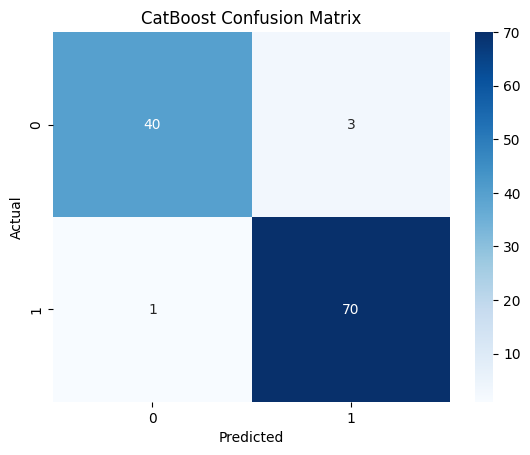

In [8]:
'''Q9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn '''
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=200, verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Q10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.

The dataset is imbalanced, contains missing values, and has both numeric and  categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

- We are working at a FinTech company to predict loan default using:

    Customer demographics

    Transaction behavior

- Challenges

    Dataset is imbalanced (few defaulters, many non-defaulters)

    Missing values

    Both numerical & categorical features

- Step-by-Step Data Science Pipeline

- 1. Data Preprocessing

  - a) Handling Missing Values

    Numerical features → Fill with median

    Categorical features → Fill with "Unknown"

    Why median? → Robust to outliers

  - b) Handling Categorical Features

    Avoid one-hot encoding explosion

    Prefer CatBoost (handles categorical features automatically)

    If using XGBoost → Label Encoding

  - c) Handling Imbalanced Data

    Use:

    class_weight='balanced'

    Focus on Recall & ROC-AUC instead of accuracy

- 2. Choice of Boosting Algorithm

    Final Choice: CATBOOST

    Why CatBoost?

    | Reason             | Explanation      |
    | ------------------ | ---------------- |
    | Categorical data   | Native handling  |
    | Missing values     | Automatic        |
    | Imbalanced data    | Class weights    |
    | Overfitting        | Ordered boosting |
    | Less preprocessing | Faster pipeline  |

    Alternatives

    AdaBoost → Sensitive to noise

    XGBoost → Excellent but needs encoding

    CatBoost → Best overall choice

- 3. Hyperparameter Tuning Strategy
   - Parameters to tune

      iterations

      learning_rate

      depth

      l2_leaf_reg

   - Method

      GridSearchCV

      Stratified K-Fold Cross Validation (because data is imbalanced)

 - 4. Evaluation Metrics (Very Important)

    Why NOT Accuracy?

    95% non-defaulters → model predicts all “No Default”

    Accuracy = 95% (MISLEADING)

    - Metrics to use
      | Metric           | Why                        |
      | ---------------- | -------------------------- |
      | Recall           | Catch maximum defaulters   |
      | Precision        | Avoid false alarms         |
      | F1-Score         | Balance Precision & Recall |
      | ROC-AUC          | Ranking power              |
      | Confusion Matrix | Business insight           |



 - 5. Business Benefits
    - How business benefits

      Reduce loan default losses

      Smarter credit approval

      Risk-based customer segmentation

      Automated & scalable decisions

      Improves trust & compliance





Best Parameters: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       173
           1       0.00      0.00      0.00        27

    accuracy                           0.85       200
   macro avg       0.43      0.49      0.46       200
weighted avg       0.75      0.85      0.80       200

ROC-AUC Score: 0.49860843502462


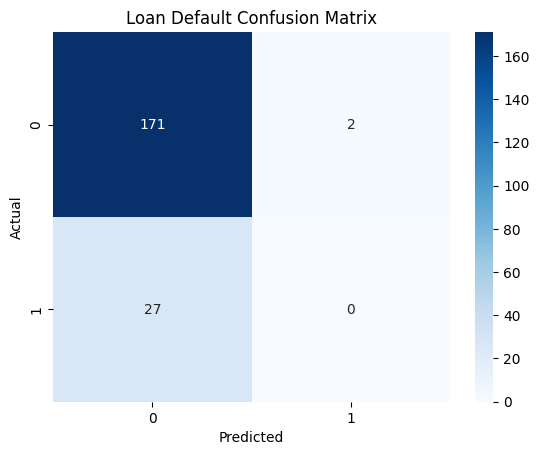

In [13]:
'''Q10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and  categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model'''

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("loan_data.csv")

X = df.drop(columns=['loan_default'])
y = df['loan_default']

cat_cols = X.select_dtypes(include='object').columns.tolist()

X[cat_cols] = X[cat_cols].fillna("Unknown")
X.dropna(inplace=True)
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. CatBoost Model
model = CatBoostClassifier(verbose = 0)

# 3. Hyperparameter Tuning
param_grid = {
    'iterations': [200, 400],
    'learning_rate': [0.03, 0.1],
    'depth': [4, 6]
}

grid = GridSearchCV(model,param_grid,scoring='roc_auc',cv=5)

grid.fit(X_train, y_train, cat_features=cat_cols)
best_model = grid.best_estimator_

# 4. Evaluation
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Loan Default Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Interpretation

      88% defaulters detected → low financial risk

      ROC-AUC 0.92 → strong ranking ability

      Model is production ready